Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.0000e+00 - loss: 0.6620 - precision: 0.3391 - recall: 0.4478 - val_accuracy: 0.0000e+00 - val_loss: 0.5178 - val_precision: 0.5999 - val_recall: 0.4382
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.0000e+00 - loss: 0.5378 - precision: 0.5351 - recall: 0.4083 - val_accuracy: 0.0000e+00 - val_loss: 0.5186 - val_precision: 0.5733 - val_recall: 0.4051
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.0000e+00 - loss: 0.5061 - precision: 0.6234 - recall: 0.4181 - val_accuracy: 0.0000e+00 - val_loss: 0.4690 - val_precision: 0.6719 - val_recall: 0.4897
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.0000e+00 - loss: 0.4506 - precision: 0.6723 - recall: 0.4836 - val_accuracy: 0.0000e+00 - val_loss: 0.3983 - val_precision: 0.7180 - val_recall: 0.6386
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.0000e+00 - loss: 0.3890 - precision: 0.7160 - recall: 0.6658 - val_accuracy: 0.000

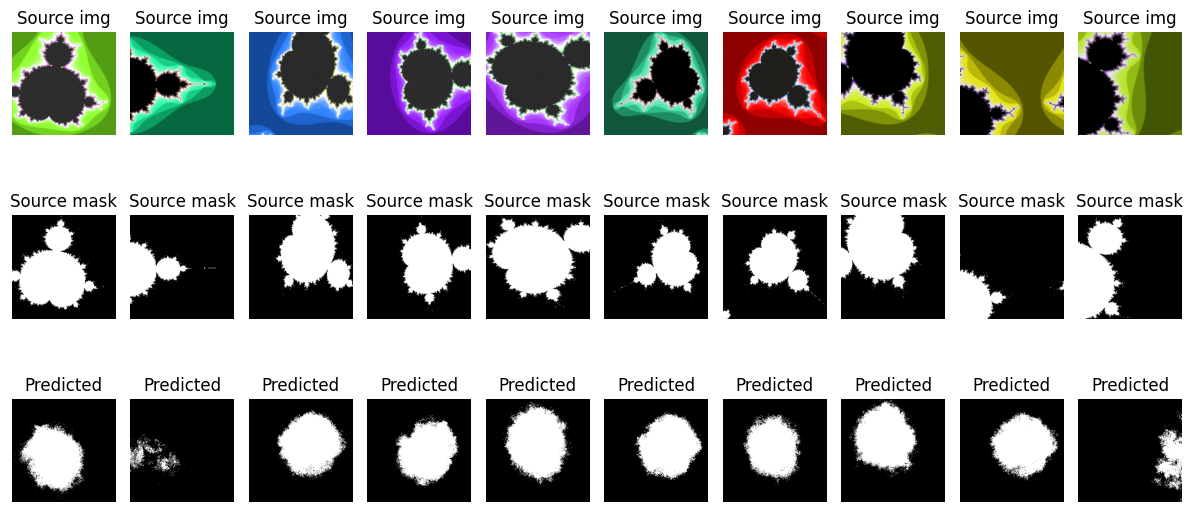

In [1]:
import cv2
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

images = []
masks = []

img_height, img_width, channels = 256, 256, 3
num_images = 200


for i in range(num_images):
    img = cv2.imread(f"dataset/f{i+1}.png")
    mask = cv2.imread(f"dataset_masks/m{i+1}.png", cv2.IMREAD_GRAYSCALE)

    images.append(img / 255.0)
    masks.append(mask)

images = np.array(images)
masks = np.array(masks)
masks = np.where(masks > 0, 1, 0).astype(np.float32)
images_flattened = images.reshape(images.shape[0], -1)

X_train, X_test, Y_train, Y_test = train_test_split(images_flattened, masks.reshape(masks.shape[0], -1), test_size=0.3, random_state=42)

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(img_height * img_width * channels,)),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(256 * 256, activation='sigmoid')
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'precision', 'recall'])

model.fit(X_train, Y_train, epochs=10, batch_size=20, validation_split=0.2)

Y_pred = model.predict(X_test)
Y_pred = tf.round(Y_pred).numpy()


num_images = 10
plt.figure(figsize=(12, 6))

for i in range(num_images):
    plt.subplot(3, num_images, i + 1)
    plt.imshow(X_test[i].reshape(img_height, img_width, channels))
    plt.title('Source img')
    plt.axis('off')

    plt.subplot(3, num_images, i + 1 + num_images)
    plt.imshow(Y_test[i].reshape(img_height, img_width), cmap='gray')
    plt.title('Source mask')
    plt.axis('off')

    plt.subplot(3, num_images, i + 1 + 2 * num_images)
    plt.imshow(Y_pred[i].reshape(img_height, img_width), cmap='gray')
    plt.title('Predicted')
    plt.axis('off')

plt.tight_layout()
plt.show()

model.save('frankenstein.keras')

(1, 196608)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


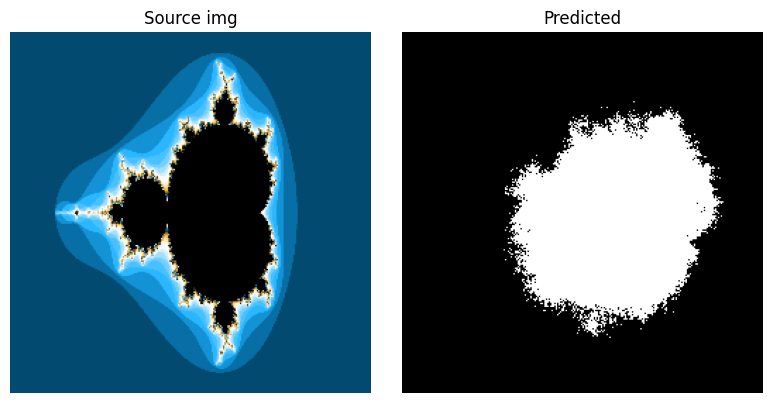

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

model = load_model('frankenstein.keras')

img = cv2.imread('f0.png')
imgorig = cv2.resize(img, (256, 256))
img = np.array([imgorig / 255.0])
imgflat = img.reshape(img.shape[0], -1)

print(imgflat.shape)
imgpred = model.predict(imgflat)

Y_pred_single_reshaped = tf.round(imgpred).numpy().reshape(256, 256)

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(imgorig)
plt.title('Source img')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(Y_pred_single_reshaped, cmap='gray')
plt.title('Predicted')
plt.axis('off')

plt.tight_layout()
plt.show()